In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
epl = pd.read_csv('/Users/ariff/Downloads/archive/results.csv', encoding = 'unicode_escape')

In [4]:
# replace NaN with 0
epl=epl.fillna(0)

In [5]:
# check the last 5 rows of the dataset
epl.tail(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [6]:
# identify number of rows & columns
epl.shape

(11113, 23)

In [7]:
# get the list of column names
print("\nColumn Names:")
print(list(epl.columns))

# check for missing values
print("\nMissing Values:")
print(epl.isnull().sum())

# check unique values in a column (e.g., 'Season')
print(f"\nAvailable Seasons: {epl['Season'].nunique()}")
epl_seasons = epl['Season'].unique()
print(f"{', '.join(epl_seasons)}")


# count unique values in a column (e.g., 'HomeTeam')
print(f"\nNumber of Unique Home Teams: {epl['HomeTeam'].nunique()}")
epl_teams = sorted(epl['HomeTeam'].unique())
print(f"{', '.join(epl_teams)}")

# perform statistical analysis on selected columns
print("\nStatistical analysis on selected columns:")
selected_columns = ['FTHG', 'FTAG', 'HS', 'AS', 'HF', 'AF']
print(epl[selected_columns].describe())

# get the maximum and minimum values of selected columns
print("\nMaximum values of selected columns:")
print(epl[selected_columns].max())

print("\nMinimum values of selected columns:")
print(epl[selected_columns].min())

# get value counts for the 'FTR' (Full-Time Result) column
print("\nValue counts for Full-Time Result:")
print(epl['FTR'].value_counts())



Column Names:
['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']

Missing Values:
Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

Available Seasons: 29
1993-94, 1994-95, 1995-96, 1996-97, 1997-98, 1998-99, 1999-00, 2000-01, 2001-02, 2002-03, 2003-04, 2004-05, 2005-06, 2006-07, 2007-08, 2008-09, 2009-10, 2010-11, 2011-12, 2012-13, 2013-14, 2014-15, 2015-16, 2016-17, 2017-18, 2018-19, 2019-20, 2020-21, 2021-22

Number of Unique Home Teams: 50
Arsenal, Aston Villa, Barnsley, Birmingham, Blackburn, Blackpool, Bolton, Bournemouth, Bradford, Brentford, Brighton, Burnley, Cardiff, Cha

In [8]:
# create a dictionary to store statistics for each season, including top and lowest scorer
season_stats = {}

# function to calculate statistics for a season
def calculate_season_stats(data, season):
    season_data = data[data['Season'] == season]
    total_goals = season_data['FTHG'].sum() + season_data['FTAG'].sum()
    avg_goals_per_match = total_goals / len(season_data)
    
    # find the top scorer for the season
    goal_counts = season_data.groupby('HomeTeam')['FTHG'].sum() + season_data.groupby('AwayTeam')['FTAG'].sum()
    top_scorer_team = goal_counts.idxmax()
    top_scorer_goals = goal_counts.max()
    
    # find the lowest scorer for the season
    lowest_scorer_team = goal_counts.idxmin()
    lowest_scorer_goals = goal_counts.min()
    
    return {
        'TotalGoals': total_goals,
        'AvgGoalsPerMatch': avg_goals_per_match,
        'TopScorer': {
            'Team': top_scorer_team,
            'Goals': top_scorer_goals
        },
        'LowestScorer': {
            'Team': lowest_scorer_team,
            'Goals': lowest_scorer_goals
        }
    }

# populate the season_stats dictionary
for season in epl['Season'].unique():
    season_stats[season] = calculate_season_stats(epl, season)

# ask the user for a season and display season statistics, including top and lowest scorer
while True:
    user_input = input("Enter a season (e.g., '1993-94') to get season statistics (or type 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        break
    
    try:
        stats = season_stats[user_input]
        print(f"Season: {user_input} \nTotal Goals Scored: {stats['TotalGoals']} \nAverage Goals Per Match: {stats['AvgGoalsPerMatch']:.2f} \nTop Scoring Team: {stats['TopScorer']['Team']} with {stats['TopScorer']['Goals']} goals \nLeast Scoring Team: {stats['LowestScorer']['Team']} with {stats['LowestScorer']['Goals']} goals")
    except KeyError:
        print(f"Season '{user_input}' not found in the dataset. Please try again.")
        print(f"Here are the available seasons: {', '.join(epl_seasons)}")

Enter a season (e.g., '1993-94') to get season statistics (or type 'exit' to quit):  2018-19


Season: 2018-19 
Total Goals Scored: 1072 
Average Goals Per Match: 2.82 
Top Scoring Team: Man City with 95 goals 
Least Scoring Team: Huddersfield with 22 goals


Enter a season (e.g., '1993-94') to get season statistics (or type 'exit' to quit):  a


Season 'a' not found in the dataset. Please try again.
Here are the available seasons: 1993-94, 1994-95, 1995-96, 1996-97, 1997-98, 1998-99, 1999-00, 2000-01, 2001-02, 2002-03, 2003-04, 2004-05, 2005-06, 2006-07, 2007-08, 2008-09, 2009-10, 2010-11, 2011-12, 2012-13, 2013-14, 2014-15, 2015-16, 2016-17, 2017-18, 2018-19, 2019-20, 2020-21, 2021-22


Enter a season (e.g., '1993-94') to get season statistics (or type 'exit' to quit):  exit


In [9]:
# create dictionaries to store team statistics
team_stats = {}
team_names = epl['HomeTeam'].unique()

# create dictionaries to store team statistics, total goals scored, and average goals per match
team_stats = {}
team_goals = {}
team_avg_goals_per_match = {}

# function to calculate team statistics
def calculate_team_stats(data, team_name):
    home_matches = data[data['HomeTeam'] == team_name]
    away_matches = data[data['AwayTeam'] == team_name]
    wins = len(home_matches[home_matches['FTR'] == 'H']) + len(away_matches[away_matches['FTR'] == 'A'])
    draws = len(home_matches[home_matches['FTR'] == 'D']) + len(away_matches[away_matches['FTR'] == 'D'])
    losses = len(home_matches[home_matches['FTR'] == 'A']) + len(away_matches[away_matches['FTR'] == 'H'])
    points = (wins * 3) + draws
    return wins, draws, losses, points

# function to calculate total goals scored by a team
def calculate_team_goals(data, team_name):
    home_goals = data[data['HomeTeam'] == team_name]['FTHG'].sum()
    away_goals = data[data['AwayTeam'] == team_name]['FTAG'].sum()
    return home_goals + away_goals

# function to calculate average goals scored per match
def calculate_avg_goals_per_match(data, team_name):
    home_matches = data[data['HomeTeam'] == team_name]
    away_matches = data[data['AwayTeam'] == team_name]
    total_goals = home_matches['FTHG'].sum() + away_matches['FTAG'].sum()
    total_matches = len(home_matches) + len(away_matches)
    return total_goals / total_matches if total_matches > 0 else 0

# populate the team_stats, team_goals, and team_avg_goals_per_match dictionaries
for team in team_names:
    wins, draws, losses, points = calculate_team_stats(epl, team)
    team_stats[team] = {'Wins': wins, 'Draws': draws, 'Losses': losses, 'Points': points}
    team_goals[team] = calculate_team_goals(epl, team)
    team_avg_goals_per_match[team] = calculate_avg_goals_per_match(epl, team)

# ask the user for a team name and display team statistics, total goals scored, and average goals per match
while True:
    user_input = input("Enter a team name to get performance statistics, total goals scored, and average goals per match (or type 'exit' to quit): ")
    user_input = user_input.lower()
    
    if user_input.lower() == 'exit':
        break
    
    try:
        user_input_title = user_input.title()
        stats = team_stats[user_input_title]
        goals = team_goals[user_input_title]
        avg_goals = team_avg_goals_per_match[user_input_title]
        print(f"Team selected: {user_input_title} \nWins: {stats['Wins']} \nDraws: {stats['Draws']} \nLosses: {stats['Losses']} \nPoints Accumulated: {stats['Points']} \nTotal Goals Scored: {goals} \nAverage Goals per Match: {avg_goals:.2f}")
    except KeyError:
        print(f"Team '{user_input}' not found in the dataset. Please try again.")
        print(f"Here are the available teams: {', '.join(epl_teams)}")


Enter a team name to get performance statistics, total goals scored, and average goals per match (or type 'exit' to quit):  Man City


Team selected: Man City 
Wins: 452 
Draws: 197 
Losses: 264 
Points Accumulated: 1553 
Total Goals Scored: 1575 
Average Goals per Match: 1.73


Enter a team name to get performance statistics, total goals scored, and average goals per match (or type 'exit' to quit):  a


Team 'a' not found in the dataset. Please try again.
Here are the available teams: Arsenal, Aston Villa, Barnsley, Birmingham, Blackburn, Blackpool, Bolton, Bournemouth, Bradford, Brentford, Brighton, Burnley, Cardiff, Charlton, Chelsea, Coventry, Crystal Palace, Derby, Everton, Fulham, Huddersfield, Hull, Ipswich, Leeds, Leicester, Liverpool, Man City, Man United, Middlesbrough, Newcastle, Norwich, Nott'm Forest, Oldham, Portsmouth, QPR, Reading, Sheffield United, Sheffield Weds, Southampton, Stoke, Sunderland, Swansea, Swindon, Tottenham, Watford, West Brom, West Ham, Wigan, Wimbledon, Wolves


Enter a team name to get performance statistics, total goals scored, and average goals per match (or type 'exit' to quit):  exit


In [ ]:
# function to calculate the number of wins, draws, and losses between two teams
def calculate_head_to_head_stats(data, team1, team2):
    # filter matches where either team1 or team2 is the home team
    home_matches = data[(data['HomeTeam'] == team1) | (data['HomeTeam'] == team2)]
    
    # filter matches where either team1 or team2 is the away team
    away_matches = data[(data['AwayTeam'] == team1) | (data['AwayTeam'] == team2)]
    
    # combine both sets of matches
    matches = pd.concat([home_matches, away_matches])
    
    # calculate the number of wins, draws, and losses for each team
    team1_wins = len(matches[(matches['HomeTeam'] == team1) & (matches['FTR'] == 'H')]) + len(matches[(matches['AwayTeam'] == team1) & (matches['FTR'] == 'A')])
    team2_wins = len(matches[(matches['HomeTeam'] == team2) & (matches['FTR'] == 'H')]) + len(matches[(matches['AwayTeam'] == team2) & (matches['FTR'] == 'A')])
    draws = len(matches[matches['FTR'] == 'D'])
    
    # calculate the number of losses
    team1_losses = len(matches[(matches['HomeTeam'] == team1) & (matches['FTR'] == 'A')]) + len(matches[(matches['AwayTeam'] == team1) & (matches['FTR'] == 'H')])
    team2_losses = len(matches[(matches['HomeTeam'] == team2) & (matches['FTR'] == 'A')]) + len(matches[(matches['AwayTeam'] == team2) & (matches['FTR'] == 'H')])
    
    return {
        f'{team1} Wins': team1_wins,
        f'{team2} Wins': team2_wins,
        'Draws': draws,
        f'{team1} Losses': team1_losses,
        f'{team2} Losses': team2_losses
    }

while True:
    # ask the user for team names
    team1 = input("Enter the first team name: ")
    team2 = input("Enter the second team name: ")

    # convert team names to title case (e.g., 'manchester united' to 'Manchester United')
    team1 = team1.title()
    team2 = team2.title()

    # check if both team names are valid
    valid_teams = set(epl['HomeTeam'].unique()) | set(epl['AwayTeam'].unique())
    if team1 not in valid_teams or team2 not in valid_teams:
        print("Invalid team names. Please enter available team names.")
        print(f"Here are the available teams: {', '.join(epl_teams)}")
        continue

    # calculate head-to-head statistics
    head_to_head_stats = calculate_head_to_head_stats(epl, team1, team2)
    print(f"Head-to-Head Statistics between {team1} and {team2}:")
    for key, value in head_to_head_stats.items():
        print(f"{key}: {value}")

    # ask the user if they want to continue or exit
    another_query = input("Do you want to compare more teams? (yes/no): ")
    if another_query.lower() != 'yes':
        break

Enter the first team name:  Arsenal
Enter the second team name:  Tottenham


Head-to-Head Statistics between Arsenal and Tottenham:
Arsenal Wins: 621
Tottenham Wins: 494
Draws: 541
Arsenal Losses: 242
Tottenham Losses: 375


Do you want to compare more teams? (yes/no):  yes
Enter the first team name:  a
Enter the second team name:  b


Invalid team names. Please enter available team names.
Here are the available teams: Arsenal, Aston Villa, Barnsley, Birmingham, Blackburn, Blackpool, Bolton, Bournemouth, Bradford, Brentford, Brighton, Burnley, Cardiff, Charlton, Chelsea, Coventry, Crystal Palace, Derby, Everton, Fulham, Huddersfield, Hull, Ipswich, Leeds, Leicester, Liverpool, Man City, Man United, Middlesbrough, Newcastle, Norwich, Nott'm Forest, Oldham, Portsmouth, QPR, Reading, Sheffield United, Sheffield Weds, Southampton, Stoke, Sunderland, Swansea, Swindon, Tottenham, Watford, West Brom, West Ham, Wigan, Wimbledon, Wolves


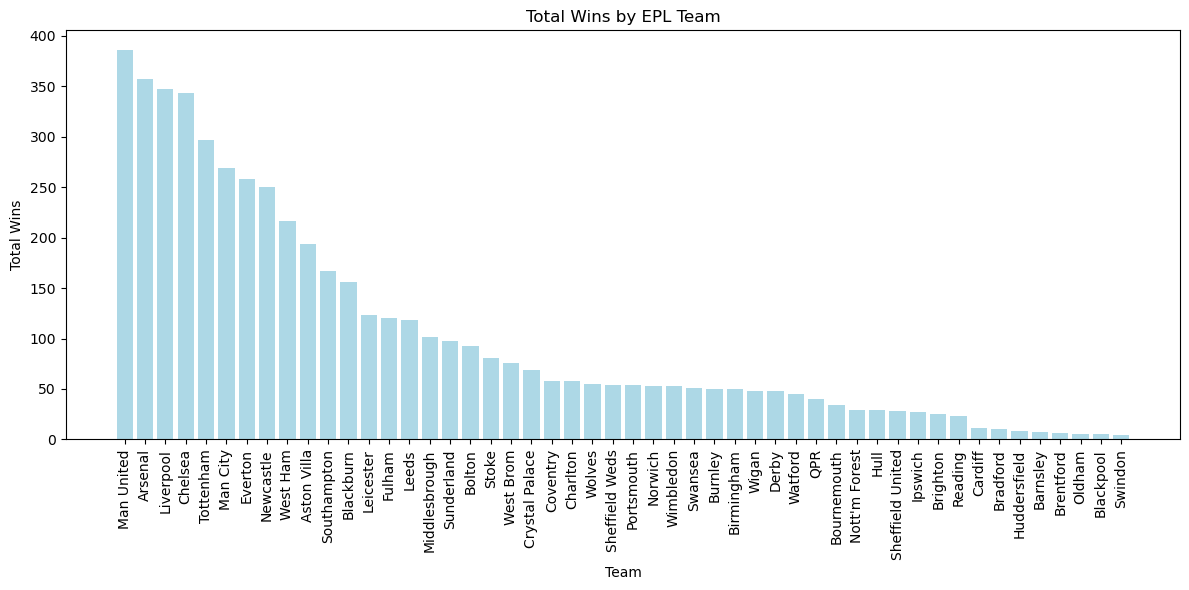

In [11]:
# group the data by team and calculate total wins
team_wins = epl.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).reset_index()
team_wins.columns = ['Team', 'Wins']

# sort teams by the number of wins in descending order
team_wins = team_wins.sort_values(by='Wins', ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(team_wins['Team'], team_wins['Wins'], color='lightblue')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Total Wins by EPL Team')
plt.xticks(rotation=90)
plt.tight_layout()

# show the plot
plt.show()

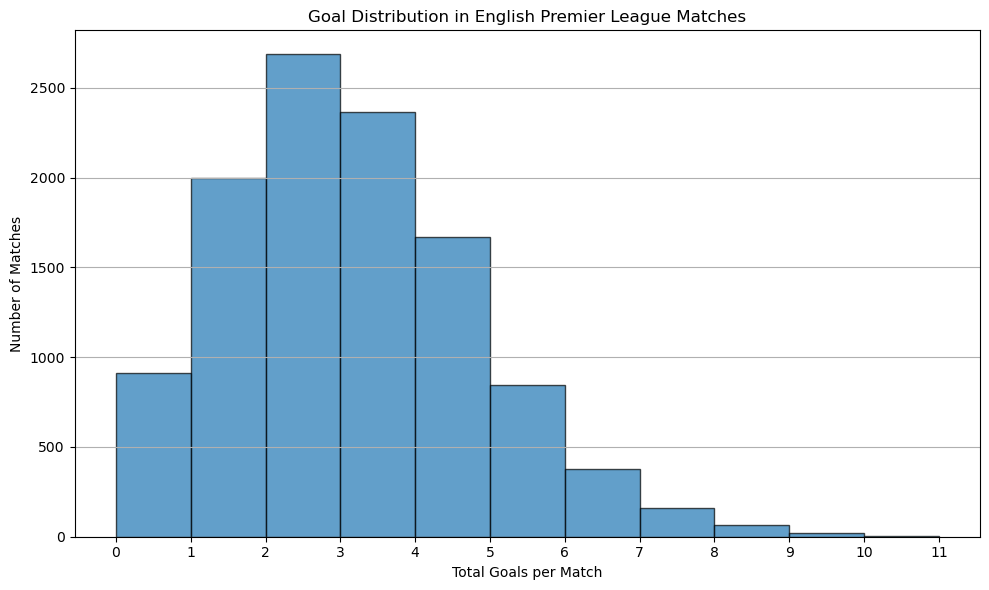

In [36]:
# combine home and away goals to get total goals per match
epl['TotalGoals'] = epl['FTHG'] + epl['FTAG']

# create a histogram
plt.figure(figsize=(10, 6))
plt.hist(epl['TotalGoals'], bins=range(0, 12), edgecolor='k', alpha=0.7)
plt.title('Goal Distribution in English Premier League Matches')
plt.xlabel('Total Goals per Match')
plt.ylabel('Number of Matches')
plt.xticks(range(0, 12))
plt.grid(axis='y')

# show the plot
plt.tight_layout()
plt.show()

In [ ]:
# thank you for viewing my small python project :)!